In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression


In [35]:
data = pd.read_csv('C:/Users/U6068266/Downloads/study/bodyfat.csv')
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [46]:
x = data.loc[:, data.columns != "BodyFat"].values
y = data.iloc[:, 1:2].values
alfa_A=[0,0.1,0.25,0.5,1,5]
p = 14

In [80]:
data_ridge=pd.DataFrame(columns=['alpha','Coefs','RMSE','Adjusted R^2'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

for a in alfa_A:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    pred_ridge = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_ridge))
    r2_r=r2_score(y_test, pred_ridge)
    n = len(y_train)
    Adj_r2 = 1-(1-r2_r)*(n-1)/(n-p-1)
    data_ridge = data_ridge.append({'alpha': a,'Coefs': ridge.coef_[0],'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = True)


C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\3424545328.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ridge = data_ridge.append({'alpha': a,'Coefs': ridge.coef_[0],'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = True)
C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\3424545328.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ridge = data_ridge.append({'alpha': a,'Coefs': ridge.coef_[0],'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = True)
C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\3424545328.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_ridge = data_ridge.append({'alpha': a,'Coefs': ridge.coef_[0],'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = T

In [81]:
data_ridge

,alpha,Coefs,RMSE,Adjusted R^2
0,0,"[-399.2497401632294, 0.01903437081420961, 0.02...",0.928412,0.987905
1,0.1,"[-51.7015936124947, 0.050308812631974065, 0.06...",4.584624,0.705052
2,0.25,"[-22.427241882714355, 0.05285121145207629, 0.0...",4.928686,0.659121
3,0.5,"[-11.541531909957104, 0.053671970791285606, 0....",5.056752,0.641176
4,1,"[-5.859334622582203, 0.05386800358673622, 0.06...",5.123500,0.631641
5,5,"[-1.1919261421858456, 0.05198901212304689, 0.0...",5.177307,0.623864


In [85]:
data_lasso=pd.DataFrame(columns=['alpha','Coefs','RMSE','Adjusted R^2'])

for a in alfa_A:
    lasso_model=Lasso(alpha=a)
    lasso_model.fit(X_train,y_train)
    pred_laso = lasso_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_laso))
    r2_l=r2_score(y_test, pred_laso)
    n = len(y_train)
    Adj_r2 = 1-(1-r2_l)*(n-1)/(n-p-1)
    data_lasso = data_lasso.append({'alpha': a,'Coefs': lasso_model.coef_,'RMSE' : rmse, 'Adjusted R^2' : r2_l}, ignore_index = True)


C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\191906121.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train,y_train)
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+02, tolerance: 1.166e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

In [86]:
data_lasso   

,alpha,Coefs,RMSE,Adjusted R^2
0,0,"[-399.2497401632289, 0.019034370814209795, 0.0...",0.928412,0.988872
1,0.1,"[-0.0, 0.04057846352416277, 0.0330931820329594...",5.148618,0.657779
2,0.25,"[-0.0, 0.023780706105673507, -0.0, -0.12767598...",5.163884,0.655746
3,0.5,"[-0.0, 0.004184419909847833, -0.05854553907254...",5.217406,0.648573
4,1,"[-0.0, 0.0025437802247973503, -0.0820417167264...",5.211831,0.649324
5,5,"[-0.0, 0.03091571432685423, -0.0, -0.0, -0.0, ...",5.682336,0.583151


In [105]:
ratio=[0,0.2,0.4,0.6,0.8,1] 
data_ElasticNet=pd.DataFrame(columns=['ratio','Coefs','alpha','RMSE','Adjusted R^2'])

for r in ratio:
    for a in alfa_A:
        ElasticNet_model=ElasticNet(l1_ratio=r ,alpha=a )
        ElasticNet_model.fit(X_train,y_train)
        pred_net = ElasticNet_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test,pred_net))
        r2_e=r2_score(y_test, pred_net)
        n = len(y_train)
        Adj_r2 = 1-(1-r2_e)*(n-1)/(n-p-1)
        data_ElasticNet = data_ElasticNet.append({'ratio': r,'Coefs': ElasticNet_model.coef_,'alpha': a, 'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = True)


C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\4202905538.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ElasticNet_model.fit(X_train,y_train)
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+02, tolerance: 1.166e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

In [106]:
data_ElasticNet

,ratio,Coefs,alpha,RMSE,Adjusted R^2
0,0,"[-399.2497401632289, 0.019034370814209795, 0.0...",0,0.928412,0.987905
1,0,"[-0.3441019323239474, 0.04675378126871173, 0.0...",0.1,5.185401,0.622686
2,0,"[-0.14088353465628517, 0.04056111114615817, 0....",0.25,5.185539,0.622666
3,0,"[-0.07252828620299062, 0.036020915606071166, 0...",0.5,5.183226,0.623003
4,0,"[-0.03787716058182658, 0.03382438807909938, 0....",1,5.182464,0.623114
5,0,"[-0.009016898327443956, 0.04998381318155967, -...",5,5.286053,0.607897
6,0.2,"[-399.2497401632289, 0.019034370814209795, 0.0...",0,0.928412,0.987905
7,0.2,"[-0.1813080698608301, 0.04536780990274818, 0.0...",0.1,5.178695,0.623662
8,0.2,"[-0.0, 0.037688825647621146, 0.032549976757733...",0.25,5.164163,0.625771
9,0.2,"[-0.0, 0.029867402522034348, 0.005455878340510...",0.5,5.149102,0.627951


In [103]:
data_ElasticNet=pd.DataFrame(columns=['ratio','Coefs','alpha','RMSE','Adjusted R^2'])

for a in alfa_A:
    ElasticNet_model=ElasticNet(l1_ratio=0.5 ,alpha=a )
    ElasticNet_model.fit(X_train,y_train)
    pred_net = ElasticNet_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_net))
    r2_e=r2_score(y_test, pred_net)
    n = len(y_train)
    Adj_r2 = 1-(1-r2_e)*(n-1)/(n-p-1)
    data_ElasticNet = data_ElasticNet.append({'ratio': 0.5,'Coefs': ElasticNet_model.coef_,'alpha': a, 'RMSE' : rmse, 'Adjusted R^2' : Adj_r2}, ignore_index = True)


C:\Users\U6068266\AppData\Local\Temp\ipykernel_20276\2350906530.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ElasticNet_model.fit(X_train,y_train)
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\U6068266\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+02, tolerance: 1.166e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

In [104]:
data_ElasticNet

,ratio,Coefs,alpha,RMSE,Adjusted R^2
0,0.5,"[-399.2497401632289, 0.019034370814209795, 0.0...",0,0.928412,0.987905
1,0.5,"[-0.0, 0.04356368147329557, 0.0466065524111898...",0.1,5.168049,0.625208
2,0.5,"[-0.0, 0.03218020394469005, 0.0123241953622638...",0.25,5.138696,0.629453
3,0.5,"[-0.0, 0.020227590547653822, -0.00778482221765...",0.5,5.174607,0.624256
4,0.5,"[-0.0, 0.008195640201661171, -0.05650177430947...",1,5.214513,0.618438
5,0.5,"[-0.0, 0.033195818920080104, -0.02091751343800...",5,5.529913,0.570884


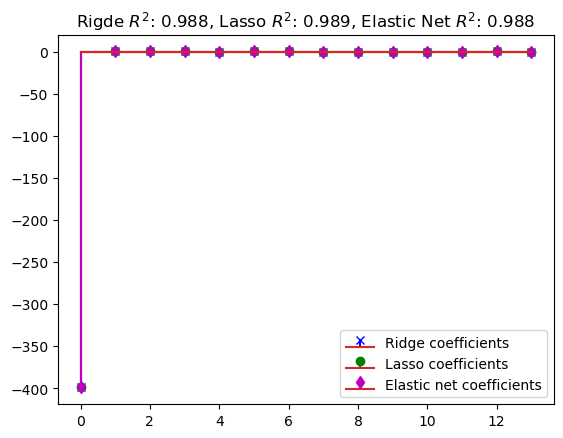

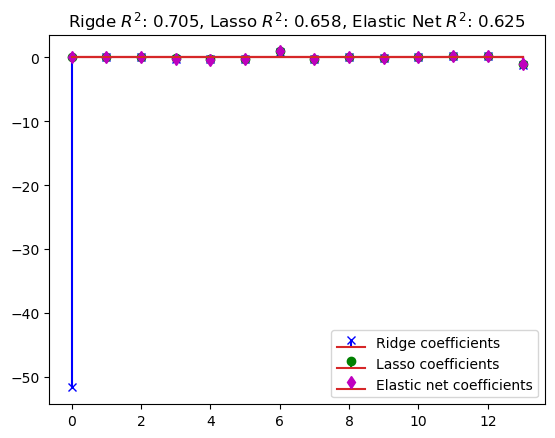

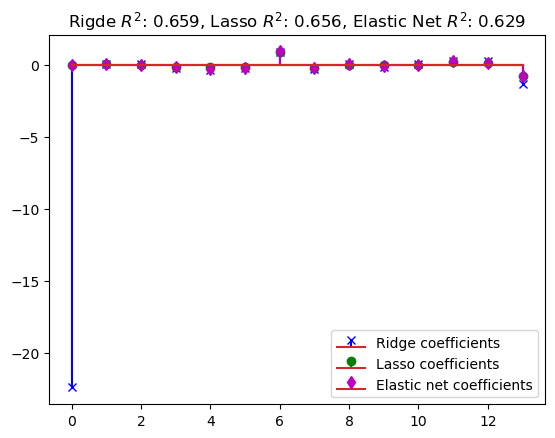

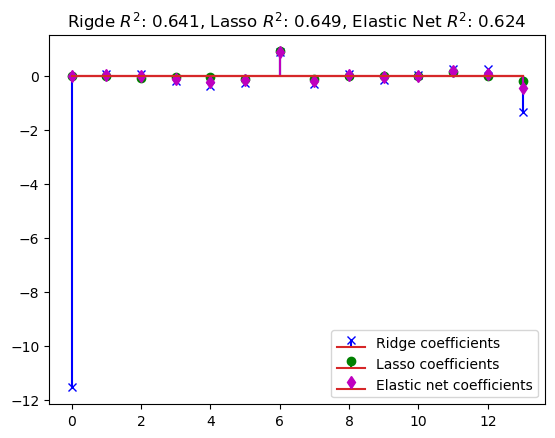

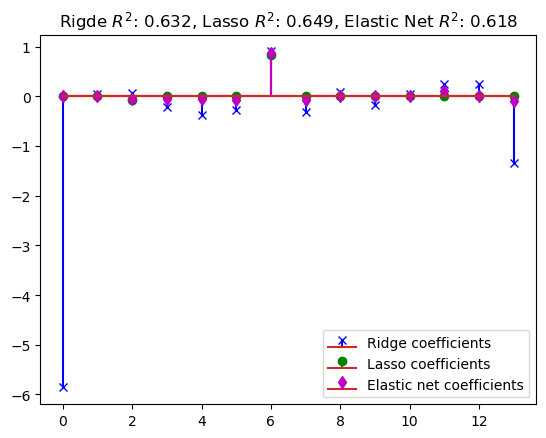

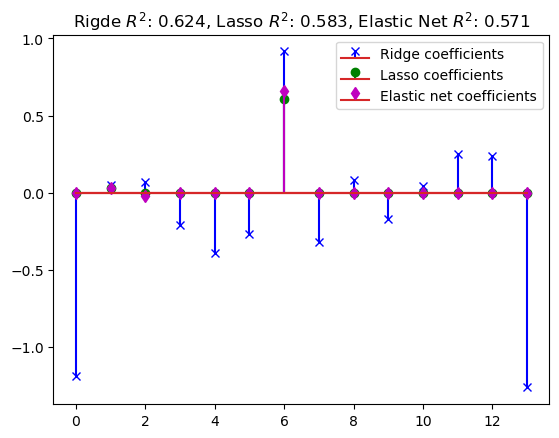

In [98]:
x = range(len(data_ElasticNet['Coefs'][0]))
alphas = [0,0.1,0.25,0.5,1,5]

for i in range(len(alphas)):
    alpha = alphas[i]
    
    #Ridge
    markerline, stemlines, baseline = plt.stem(x, data_ridge['Coefs'][i],markerfmt="x", label="Ridge coefficients")
    markerline.set_markerfacecolor('none')
    plt.setp([markerline, stemlines], color="blue")
    
    #Lasso
    markerline, stemlines, baseline = plt.stem(x, data_lasso['Coefs'][i], markerfmt="o", label="Lasso coefficients")
    plt.setp([markerline, stemlines], color="green")

    #Elastic Net
    markerline, stemlines, baseline = plt.stem(x, data_ElasticNet['Coefs'][i], markerfmt="d", label="Elastic net coefficients",)
    plt.setp([markerline, stemlines], color="m")

    plt.legend(loc="best")
    plt.title(
    "Rigde $R^2$: %.3f, Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (data_ridge['Adjusted R^2'][i],
                                                                       data_lasso['Adjusted R^2'][i],
                                                                       data_ElasticNet['Adjusted R^2'][i])
    )
    plt.show()
    